Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

a.Построить точечный график
b.Рассчитать коэффициенты корреляции Пирсона и Спирмена
c.Построить модель линейной регрессии
d.Рассчитать коэффициент детерминации
e.Вывести график остатков

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy.stats.stats import pearsonr

In [3]:
water = pd.read_csv('water.csv')

In [8]:
water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [6]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


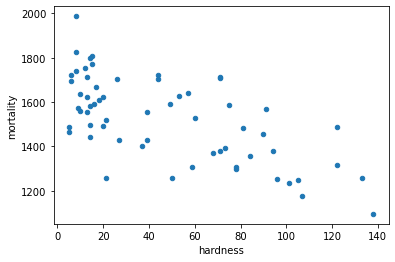

In [11]:
water.plot(kind='scatter', x='hardness', y='mortality')

In [12]:
water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [16]:
pearsonr(water['hardness'], water['mortality'])

(-0.6548486232042465, 1.033133926034952e-08)

In [5]:
X = water[['hardness']]
y = water['mortality']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
model.coef_

array([-3.13167087])

In [21]:
model.intercept_

1668.9722977277095

In [22]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [23]:
#значение коэффициента детерминации
model.score(X_test, y_test)

0.5046490611017092

Вывод: есть связь между жесткостью воды и смертностью, так как кофэффициент детерминации на меньше 50%

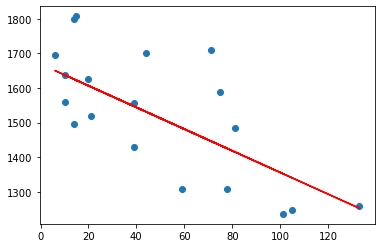

In [24]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [1]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [7]:
# const
X_const = sm.add_constant(X_train) 

In [8]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           7.83e-06
Time:                        14:38:29   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

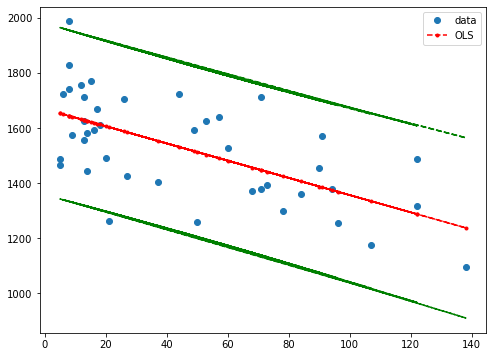

In [9]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

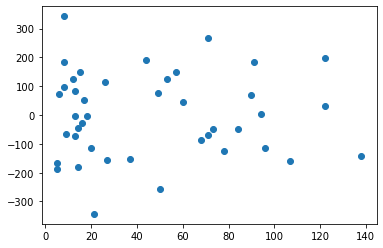

In [10]:
#остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

Задание.2
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [17]:
df_south = water[water.location =='South']
df_north = water[water.location=='North']

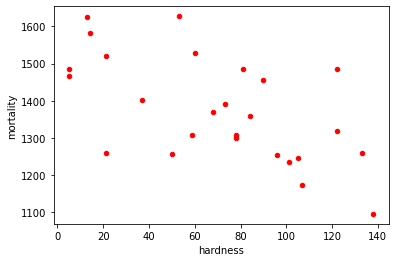

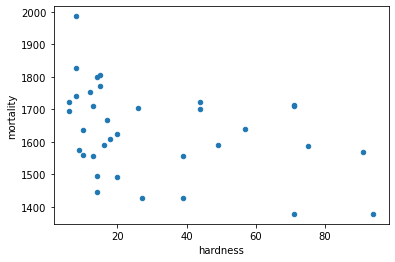

In [20]:
df_south.plot(kind='scatter', x='hardness', y='mortality', c='r')
df_north.plot(kind='scatter', x='hardness', y='mortality')

In [22]:
df_south[['hardness', 'mortality']].corr(method='spearman')


,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [23]:
df_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [25]:
X_s = df_south[['hardness']]
y_s = df_south['mortality']
X_n = df_north[['hardness']]
y_n = df_north['mortality']

In [26]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.30, random_state=42)
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.30, random_state=42)

In [27]:
model_s = LinearRegression()
model_s.fit(X_train_s, y_train_s)
model_n = LinearRegression()
model_n.fit(X_train_n, y_train_n)

LinearRegression()

In [28]:
y_pred_s = model_s.predict(X_test_s)
y_pred_n = model_n.predict(X_test_n)

In [29]:
#значение коэффициента детерминации Юга
model_s.score(X_test_s, y_test_s)

-2.551922301235205

In [30]:
#значение коэффициента детерминации Севера
model_n.score(X_test_n, y_test_n)

0.018885304285745863

Вывод:
    при разделение на Южные и Северные регионы зависимости не наблюдается

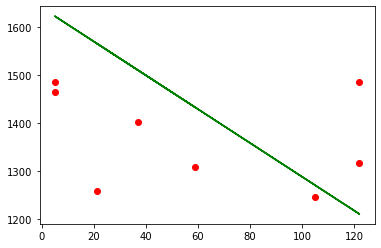

In [31]:
#график южных регионов
plt.scatter(X_test_s, y_test_s, c='r')
plt.plot(X_test_s, y_pred_s, c='g')

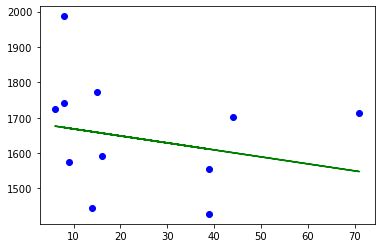

In [33]:
#график северных регионов
plt.scatter(X_test_n, y_test_n, c='b')
plt.plot(X_test_n, y_pred_n, c='g')